# Dataset

Before we try to demonstrate positional bias, we need a good source of MCQs. We'll use the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. MMLU contains 14,042 MCQs from 57 categories.

Here, we load the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. Each question has 4 options A, B, C, and D and one correct answer. In addition, each category has 5 example questions designed for consistent, 5-shot experiments.

# Setup

In [1]:
import logging
from pathlib import Path

from matplotlib import pyplot as plt

import llm_mcq_bias as lmb

In [2]:
project_path = Path("../")
datasets_path = project_path / ".build" / "datasets"

logger = logging.getLogger(__name__)

# Load Data

We'll start by loading the unmodified MMLU dataset.

In [3]:
# Load example questions
examples = lmb.datasets.mmlu.load_dataset(datasets_path, segment="dev")

# Load test questions
questions = lmb.datasets.mmlu.load_dataset(datasets_path, segment="test")

In [4]:
questions.sample(n=5)

,question,A,B,C,D,answer,category
4600,Children develop internal representational sys...,Sensorimotor,Preoperational,Symbolic,Concrete operational,B,high school psychology
2082,Which of the following circumstances most like...,There are unusual discrepancies between the en...,Management enforces strict budgetary controls ...,Cash transactions are electronically processed...,The monthly bank reconciliation ordinarily inc...,A,professional accounting
13288,What family do most European languages belong to?,Ural-Altaic,Basque,Indo-European,Phoenician,C,high school geography
13768,This question refers to the following informat...,"New England businessmen, who were discriminate...","Southern women, who incorporated it into a lar...","bankers, who had run out of paper currency to ...","farmers, who hoped that a more generous money ...",D,high school us history
9733,"Up to isomorphism, how many additive abelian g...",0,1,2,3,D,college mathematics


# Answer Distribution

Our goal is to quantify a model's inherrent positional bias by measuring the difference in accuracy caused by shifting all the correct answers to a specific option. However, if the initial pool of questions is already biased, it becomes difficult to confidently estimate the model's underlying bias.

Let's take a look at the distribution of correct answers in MMLU dataset.

Text(0.5, 1.0, 'Examples')

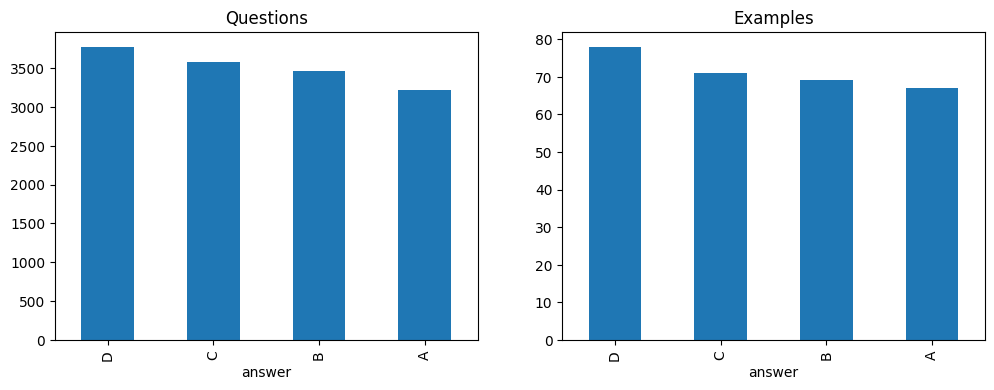

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Questions")

examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Examples")

We can see a slight bias in both the test and example questions.

# Normalize Answer Distribution

To better support our positional bias experiment, we normalize the answer distribution so each option is uniformly distributed.

## Questions

In [6]:
normalized_questions = lmb.datasets.mmlu.normalize_question_answers(questions)

In [7]:
normalized_questions.head()

,question,A,B,C,D,answer,category
0,"Long was a purchasing agent for Frost, a sole ...","Yes, because Long's agency survived Frost's in...","Yes, because the order was valid regardless of...","No, because Long did not have authority to ent...","No, because Grant dealt only with Long.",C,professional accounting
1,"During a violent electrical storm one night, a...","The plaintiff, because the emergency measure w...","The city, because the church was the lowest bi...","The plaintiff, because the present arrangement...","The city, because the classroom arrangement do...",D,professional law
2,"Under the Sales Article of the UCC, which of t...",The seller knows the particular purpose for wh...,The buyer is purchasing the goods for a partic...,The buyer is purchasing the goods for a partic...,The seller knows the particular purpose for wh...,A,professional accounting
3,Of the following choices the most direct excha...,firms supply goods to households in exchange f...,households provide resources to firms in excha...,households provide revenues to firms in exchan...,households provide goods to firms in exchange ...,A,high school macroeconomics
4,Research that demonstrates parents who play mo...,Psychodynamic,Cognitive development,Social learning,Gender schema,C,professional psychology


Text(0.5, 1.0, 'Normalized Questions')

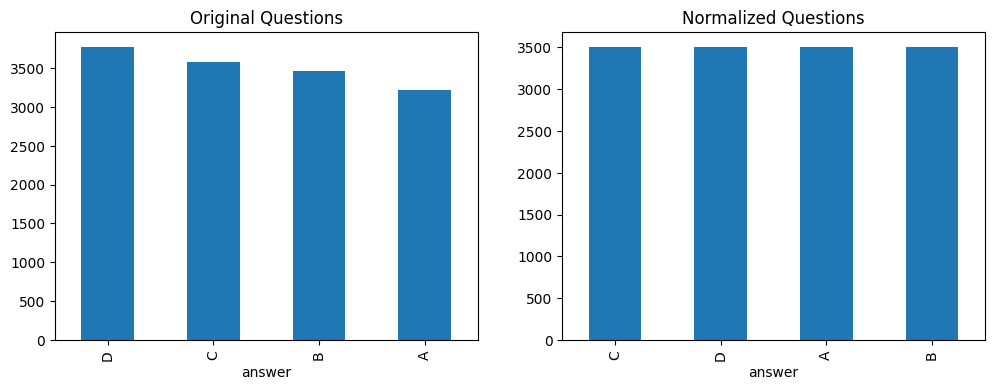

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Questions")

normalized_questions.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Questions")

## Examples

Each category has 5 example questions used to generate few-shot prompts. Since we only have 4 options, we can't evenly distribute the 5 answers for each category. Since we're not trying to maximize model accuracy, we simply throw away one of the example questions and evenly distribute the remaining 4.

In [9]:
normalized_examples = lmb.datasets.mmlu.normalize_example_answers(examples)

Text(0.5, 1.0, 'Normalized Examples')

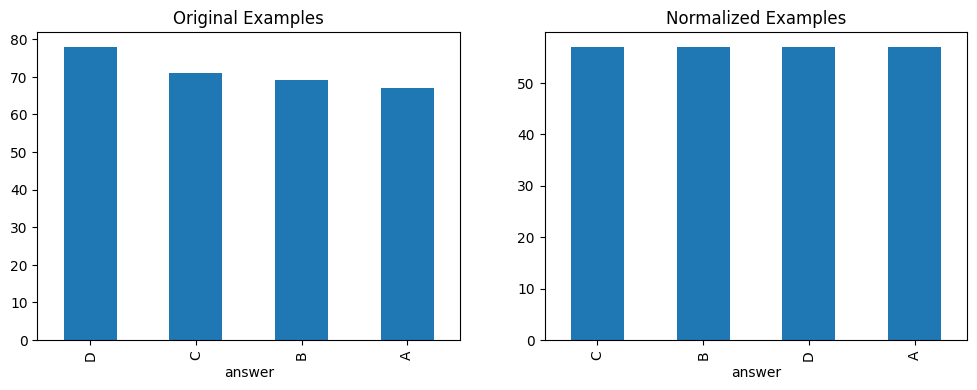

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

examples.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Examples")

normalized_examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Examples")